In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [ ]:
item_categories = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/main_item_categories.csv')
items = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/main_items.csv')
sales_train = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/main_sales_train.csv')

shops = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/main_shops.csv')

In [ ]:
df = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/main_df.csv')
data = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/main_all_data.csv')

In [ ]:
test = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/test.csv')

In [ ]:
data_encoded = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/main_all_data_encoded.csv')

In [2]:
matrix = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/matrix.csv')

In [ ]:
matrix.shape

In [ ]:
ex = data_encoded[data_encoded['date_block_num']>11]

In [ ]:
train = ex[ex['date_block_num']<34]
sub_test = ex[ex['date_block_num']==34]

In [3]:
df = matrix[['item_cnt_month_lag_1',
 'date_item_city_avg_item_cnt_lag_1',
 'item_cnt_month_lag_2',
 'item_category_id',
 'item_cnt_month_lag_3',
 'date_shop_cat_avg_item_cnt_lag_1',
 'item_cnt_month_lag_6',
 'date_item_avg_item_cnt_lag_1',
 'item_first_sale',
 'city_code']]

In [4]:
matrix['sum'] = df.sum(axis=1)
matrix['std'] = df.std(axis=1)
matrix['mean'] = df.mean(axis=1)
matrix['median'] = df.median(axis=1)
matrix['max'] = df.max(axis=1)
matrix['min'] = df.min(axis=1)

In [5]:
del df

In [6]:
X_train = matrix[matrix.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = matrix[matrix.date_block_num < 33]['item_cnt_month']
X_valid = matrix[matrix.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = matrix[matrix.date_block_num == 33]['item_cnt_month']
X_test = matrix[matrix.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [7]:
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import random
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

#from tensorflow.python.framework import ops

from numpy import save
from numpy import load

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [33]:
model = Sequential()
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(25,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros', input_shape=(30000,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(20,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros'))

In [34]:
model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9),
              loss='mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])

In [35]:
%%time
model.fit(X_train.values, Y_train.values, epochs=2, validation_data = (X_valid.values, Y_valid.values))

Train on 6186922 samples, validate on 238172 samples
Epoch 1/2
6186922/6186922 [==============================] - 755s 122us/sample - loss: 0.8959 - mean_squared_error: 0.8959 - val_loss: 0.9500 - val_mean_squared_error: 0.9500
Epoch 2/2
6186922/6186922 [==============================] - 796s 129us/sample - loss: 0.8591 - mean_squared_error: 0.8591 - val_loss: 1.0241 - val_mean_squared_error: 1.0241
Wall time: 25min 53s


In [13]:
from tensorflow import keras

In [14]:
model.save('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/my_model1.h5')

In [20]:
new_model = keras.models.load_model('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/tables/my_model.h5')

In [21]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo multiple                  160       
_________________________________________________________________
dense (Dense)                multiple                  820       
_________________________________________________________________
batch_normalization_1 (Batch multiple                  80        
_________________________________________________________________
dense_1 (Dense)              multiple                  294       
_________________________________________________________________
batch_normalization_2 (Batch multiple                  56        
_________________________________________________________________
dense_2 (Dense)              multiple                  15        
Total params: 1,425
Trainable params: 1,277
Non-trainable params: 148
____________________________________________________

In [22]:
new_model.evaluate(X_valid.values, Y_valid.values, verbose=1)

238172/238172 [==============================] - 13s 55us/sample - loss: 0.9308 - mean_squared_error: 0.9308


[0.930824104648379, 0.93082386]

In [23]:
y_preds = new_model.predict(X_test)

In [24]:
y_preds

array([[0.50138354],
       [0.07982135],
       [1.3496163 ],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [18]:
%%time
new_model.fit(X_train.values, Y_train.values, epochs=2, validation_data = (X_valid.values, Y_valid.values))

Train on 6186922 samples, validate on 238172 samples
Epoch 1/2
6186922/6186922 [==============================] - 881s 142us/sample - loss: 0.8405 - mean_squared_error: 0.8405 - val_loss: 1.0429 - val_mean_squared_error: 1.0429
Epoch 2/2
6186922/6186922 [==============================] - 752s 122us/sample - loss: 0.8565 - mean_squared_error: 0.8565 - val_loss: 332023.4133 - val_mean_squared_error: 332022.3125
Wall time: 27min 17s


In [19]:
new_model.evaluate(X_valid.values, Y_valid.values, verbose=1)

238172/238172 [==============================] - 13s 56us/sample - loss: 332023.4133 - mean_squared_error: 332022.3125


[332023.4132721716, 332022.3]

In [17]:
X_valid.shape

(238172, 40)

In [7]:
X_train.shape

(6186922, 40)

In [ ]:
X_train

In [6]:
from sklearn.linear_model import LinearRegression

In [8]:
%%time
lr = LinearRegression()
lr.fit(X_train, Y_train)

Wall time: 15.3 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
Y_pred = lr.predict(X_valid).clip(0, 20)
Y_test = lr.predict(X_test).clip(0, 20)
mean_squared_error(Y_valid, Y_pred), r2_score(Y_valid, Y_pred)

(0.9269372615371291, 0.28191585573364053)

In [ ]:
test.shape

In [ ]:
train.shape

In [ ]:
train = matrix[:6425094]
sub_test = matrix[6425094:]

In [ ]:
train = train[train['date_block_num'] > 11]

In [ ]:
train1 = train[train['date_block_num'] < 33]
train1 = train1[train1['date_block_num']!=0]
valid = train[train['date_block_num'] >= 33]

x_train1 = train1.drop('item_cnt_month',axis=1)
y_train1 = train1['item_cnt_month']
x_valid = valid.drop('item_cnt_month',axis=1)
y_valid = valid['item_cnt_month']

# catboost

In [ ]:
from catboost import CatBoostRegressor

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
catb = CatBoostRegressor(task_type="GPU",iterations=1500)
catb.fit(X_train, Y_train)

In [ ]:
Y_pred = catb.predict(X_valid).clip(0, 20)
Y_test = catb.predict(X_test).clip(0, 20)
mean_squared_error(Y_valid, Y_pred), r2_score(Y_valid, Y_pred)

In [ ]:
mean_squared_error(y_valid, y_preds), r2_score(y_valid, y_preds)

In [ ]:
mean_squared_error(y_valid, y_preds), r2_score(y_valid, y_preds)

In [ ]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x_valid.columns, catb.feature_importances_)

In [ ]:
catb.calc_feature_statistics(x_train1,y_train1,feature=8, plot=True);

In [ ]:
data_encoded.columns

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

In [ ]:
Y_pred = model.predict(X_valid).clip(0, 20)
Y_test = model.predict(X_test).clip(0, 20)
mean_squared_error(Y_valid, Y_pred), r2_score(Y_valid, Y_pred)

# LGBM

In [9]:
from lightgbm import LGBMRegressor

In [10]:
%%time
lgbm = LGBMRegressor(num_leaves=31,max_depth=11,bagging_fraction=1.0,feature_fraction = 0.2,
                         min_data_in_leaf=111,learning_rate=0.01,n_estimators=10000)
lgbm.fit(X_train, Y_train)

Wall time: 22min 16s


LGBMRegressor(bagging_fraction=1.0, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.2,
              importance_type='split', learning_rate=0.01, max_depth=11,
              min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=111, min_split_gain=0.0, n_estimators=10000,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [11]:
Y_pred = lgbm.predict(X_valid).clip(0, 20)
Y_test = lgbm.predict(X_test).clip(0, 20)
mean_squared_error(Y_valid, Y_pred), r2_score(Y_valid, Y_pred)

(0.8141019229084108, 0.3693276698275576)

In [12]:
Y_pred = lgbm.predict(X_valid).clip(0, 20)
Y_test = lgbm.predict(X_test).clip(0, 20)
mean_squared_error(Y_valid, Y_pred), r2_score(Y_valid, Y_pred)

(0.8182790056779007, 0.36609174758068963)

In [37]:
Y_pred = lgbm.predict(X_valid).clip(0, 20)
Y_test = lgbm.predict(X_test).clip(0, 20)
mean_squared_error(Y_valid, Y_pred), r2_score(Y_valid, Y_pred)

(0.8179867446897431, 0.3663181577060476)

In [25]:
Y_test.shape

(214200,)

In [20]:
dep = list(range(4,20))

In [21]:
train_sc = []
val_sc = []
for i in dep:
    lgbm = LGBMRegressor(max_depth=i)
    lgbm.fit(X_train, Y_train)
    Y_pred = lgbm.predict(X_valid).clip(0, 20)
    Y_test = lgbm.predict(X_train).clip(0, 20)
    a,b = mean_squared_error(Y_train, Y_test),mean_squared_error(Y_valid, Y_pred)
    train_sc.append(mean_squared_error(Y_train, Y_test))
    val_sc.append(mean_squared_error(Y_valid, Y_pred))
    print(a)
    print(b)
    print()

0.7251109242122196
0.8542266104874695

0.6922023102686249
0.8412891201504366

0.6755363963908131
0.8433372001115922

0.6680895410124554
0.8474833982953026

0.6571718769954373
0.8357554553442659

0.653429462052668
0.8479415933110179

0.6484304845484267
0.8416577445934876

0.6482558015069713
0.8348485625078017

0.6452298586120755
0.8484113559346343

0.6458650704278588
0.8503182509085405

0.6465800818492479
0.8454113063431988

0.6438330194800685
0.8390248820642496

0.6438330194800685
0.8390248820642496

0.6438330194800685
0.8390248820642496

0.6438330194800685
0.8390248820642496



KeyboardInterrupt: 

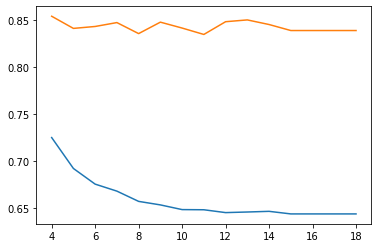

In [28]:
sns.lineplot(dep[:15],train_sc)
sns.lineplot(dep[:15],val_sc)

In [35]:
num_leaves = list(range(25,40))

In [32]:
num_leaves1 = list(range(25,30))

In [33]:
%%time
train_sc1 = []
val_sc1 = []
for i in num_leaves1:
    lgbm = LGBMRegressor(num_leaves=i,max_depth=11)
    lgbm.fit(X_train, Y_train)
    Y_pred = lgbm.predict(X_valid).clip(0, 20)
    Y_test = lgbm.predict(X_train).clip(0, 20)
    a,b = mean_squared_error(Y_train, Y_test),mean_squared_error(Y_valid, Y_pred)
    train_sc1.append(mean_squared_error(Y_train, Y_test))
    val_sc1.append(mean_squared_error(Y_valid, Y_pred))
    print(str(i) + ' : ' + str(a))
    print(str(i) + ' : ' + str(b))
    print()

25 : 0.6623182325930771
25 : 0.834835736528779

26 : 0.659367380873347
26 : 0.8529838455511514

27 : 0.651336776140505
27 : 0.8611762078589583

28 : 0.6516007771198215
28 : 0.8560088428740386

29 : 0.6492338470001894
29 : 0.838196570508212

Wall time: 5min 3s


In [36]:
train_sc1 = []
val_sc1 = []
for i in num_leaves:
    lgbm = LGBMRegressor(num_leaves=i,max_depth=11)
    lgbm.fit(X_train, Y_train)
    Y_pred = lgbm.predict(X_valid).clip(0, 20)
    Y_test = lgbm.predict(X_train).clip(0, 20)
    a,b = mean_squared_error(Y_train, Y_test),mean_squared_error(Y_valid, Y_pred)
    train_sc.append(mean_squared_error(Y_train, Y_test))
    val_sc.append(mean_squared_error(Y_valid, Y_pred))
    print(str(i) + ' : ' + str(a))
    print(str(i) + ' : ' + str(b))
    print()

25 : 0.661168697028784
25 : 0.8429412832291012

26 : 0.6590835710654627
26 : 0.8607339442806453

27 : 0.6555625549160161
27 : 0.846139517781213

28 : 0.651431003824746
28 : 0.8551250503310523

29 : 0.650213264317865
29 : 0.8387331482970567

30 : 0.6507498697293739
30 : 0.8394930240288045

31 : 0.6482558015069713
31 : 0.8348485625078017

32 : 0.6467870027951446
32 : 0.8579463217736749

33 : 0.6420958650270107
33 : 0.8500072406908441

34 : 0.6422412362912197
34 : 0.8529285481385217

35 : 0.639122172473904
35 : 0.8379577193482071

36 : 0.638558972521763
36 : 0.8480118348985286

37 : 0.6374813980655496
37 : 0.8378798101288332

38 : 0.631425574031043
38 : 0.8604090149597619

39 : 0.6325942224812746
39 : 0.8414913292112833



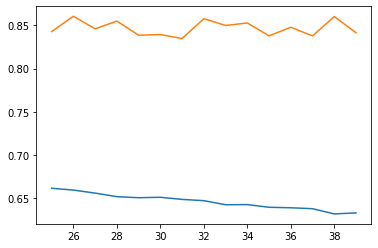

In [43]:
sns.lineplot(num_leaves,train_sc[-15:])
sns.lineplot(num_leaves,val_sc[-15:])

In [42]:
len(train_sc[-15:])

15

In [ ]:
31

In [6]:
fraction = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95,1.0]

In [9]:
train_sc2 = []
val_sc2 = []
for i in fraction:
    lgbm = LGBMRegressor(num_leaves=31,max_depth=11,bagging_fraction=i)
    lgbm.fit(X_train, Y_train)
    Y_pred = lgbm.predict(X_valid).clip(0, 20)
    Y_test = lgbm.predict(X_train).clip(0, 20)
    a,b = mean_squared_error(Y_train, Y_test),mean_squared_error(Y_valid, Y_pred)
    train_sc2.append(mean_squared_error(Y_train, Y_test))
    val_sc2.append(mean_squared_error(Y_valid, Y_pred))
    print(str(i) + ' : ' + str(a))
    print(str(i) + ' : ' + str(b))
    print()

0.2 : 0.6482558015069713
0.2 : 0.8348485625078017

0.3 : 0.6482558015069713
0.3 : 0.8348485625078017

0.4 : 0.6482558015069713
0.4 : 0.8348485625078017

0.5 : 0.6482558015069713
0.5 : 0.8348485625078017

0.6 : 0.6482558015069713
0.6 : 0.8348485625078017

0.7 : 0.6482558015069713
0.7 : 0.8348485625078017

0.8 : 0.6482558015069713
0.8 : 0.8348485625078017

0.85 : 0.6482558015069713
0.85 : 0.8348485625078017

0.9 : 0.6482558015069713
0.9 : 0.8348485625078017

0.95 : 0.6482558015069713
0.95 : 0.8348485625078017

1.0 : 0.6482558015069713
1.0 : 0.8348485625078017



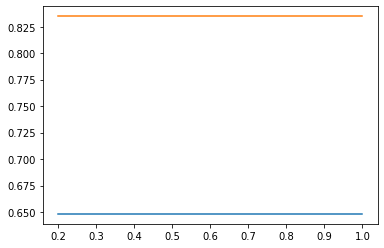

In [10]:
sns.lineplot(fraction,train_sc2)
sns.lineplot(fraction,val_sc2)

In [11]:
feature = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95,1.0]

In [12]:
%%time
train_sc3 = []
val_sc3 = []
for i in feature:
    lgbm = LGBMRegressor(num_leaves=31,max_depth=11,bagging_fraction=1.0,feature_fraction = i)
    lgbm.fit(X_train, Y_train)
    Y_pred = lgbm.predict(X_valid).clip(0, 20)
    Y_test = lgbm.predict(X_train).clip(0, 20)
    a,b = mean_squared_error(Y_train, Y_test),mean_squared_error(Y_valid, Y_pred)
    train_sc3.append(mean_squared_error(Y_train, Y_test))
    val_sc3.append(mean_squared_error(Y_valid, Y_pred))
    print(str(i) + ' : ' + str(a))
    print(str(i) + ' : ' + str(b))
    print()

0.2 : 0.6857734811658501
0.2 : 0.8289962255329273

0.3 : 0.6771581327361674
0.3 : 0.8418681096490674

0.4 : 0.6627947206842487
0.4 : 0.8463666365718631

0.5 : 0.6551713491936388
0.5 : 0.837300749931969

0.6 : 0.6511601064758343
0.6 : 0.8334964585358493

0.7 : 0.6466473865124256
0.7 : 0.8454677698097516

0.8 : 0.6516729142306086
0.8 : 0.8527825479236064

0.85 : 0.645885873496193
0.85 : 0.8574208397807154

0.9 : 0.6519069085883735
0.9 : 0.8525839372028889

0.95 : 0.6510389349090433
0.95 : 0.8537147923044115

1.0 : 0.6482558015069713
1.0 : 0.8348485625078017

Wall time: 11min 45s


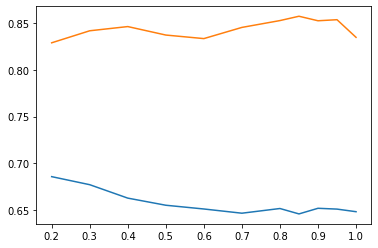

In [13]:
sns.lineplot(feature,train_sc3)
sns.lineplot(feature,val_sc3)

In [18]:
min_data = [107,108,109,110,111,112,115,120]

In [19]:
%%time
train_sc4 = []
val_sc4 = []
for i in min_data:
    lgbm = LGBMRegressor(num_leaves=31,max_depth=11,bagging_fraction=1.0,feature_fraction = 0.2, min_data_in_leaf=i)
    lgbm.fit(X_train, Y_train)
    Y_pred = lgbm.predict(X_valid).clip(0, 20)
    Y_test = lgbm.predict(X_train).clip(0, 20)
    a,b = mean_squared_error(Y_train, Y_test),mean_squared_error(Y_valid, Y_pred)
    train_sc4.append(mean_squared_error(Y_train, Y_test))
    val_sc4.append(mean_squared_error(Y_valid, Y_pred))
    print(str(i) + ' : ' + str(a))
    print(str(i) + ' : ' + str(b))
    print()

107 : 0.688204569138553
107 : 0.8246560938136606

108 : 0.6882817029465795
108 : 0.8235309555383021

109 : 0.6883017691449279
109 : 0.8239779083591735

110 : 0.6871461408257731
110 : 0.8229183737472467

111 : 0.6870224582609399
111 : 0.8201552589197719

112 : 0.6870981012460968
112 : 0.8205933470618513

115 : 0.6869224271212503
115 : 0.8220798303584822

120 : 0.6879312246268227
120 : 0.826340213507575

Wall time: 4min 55s


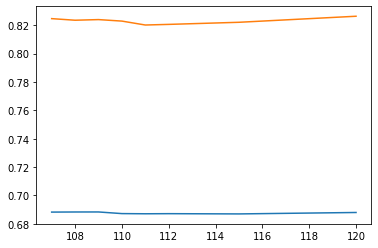

In [20]:
sns.lineplot(min_data,train_sc4)
sns.lineplot(min_data,val_sc4)

In [21]:
min(val_sc4)

0.8201552589197719

In [5]:
n = [2000, 2500, 3000, 5000]

In [9]:
%%time
train_sc5 = []
val_sc5 = []
for i in n:
    lgbm = LGBMRegressor(num_leaves=31,max_depth=11,bagging_fraction=1.0,feature_fraction = 0.2,
                         min_data_in_leaf=111,learning_rate=0.01,n_estimators=i)
    lgbm.fit(X_train, Y_train)
    Y_pred = lgbm.predict(X_valid).clip(0, 20)
    Y_test = lgbm.predict(X_train).clip(0, 20)
    a,b = mean_squared_error(Y_train, Y_test),mean_squared_error(Y_valid, Y_pred)
    train_sc5.append(mean_squared_error(Y_train, Y_test))
    val_sc5.append(mean_squared_error(Y_valid, Y_pred))
    print(str(i) + ' : ' + str(a))
    print(str(i) + ' : ' + str(b))
    print()

2000 : 0.6471991048801466
2000 : 0.8279324757643683

2500 : 0.635865643159404
2500 : 0.8269333891457628

3000 : 0.6270740439853721
3000 : 0.8262798072478347

5000 : 0.6006070930193464
5000 : 0.8254119891590387

Wall time: 50min 49s


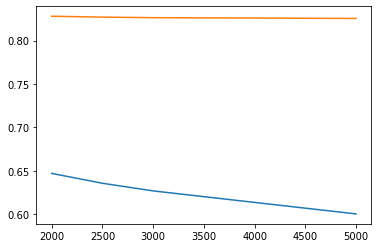

In [10]:
sns.lineplot(n,train_sc5)
sns.lineplot(n,val_sc5)

In [ ]:
y_preds = lgbm.predict(x_valid).clip(0,20)

In [ ]:
mean_squared_error(y_valid, y_preds), r2_score(y_valid, y_preds)

In [ ]:
mean_squared_error(y_valid, y_preds), r2_score(y_valid, y_preds)

In [ ]:
plt.figure(figsize=(22, 6))
sns.scatterplot(sub_test.drop('item_cnt_month',axis=1).columns, lgbm.feature_importances_)

# xgb

In [ ]:
from xgboost import XGBRegressor

In [ ]:
score_train = []
score_valid = []

In [ ]:
%%time
r = list(range(4,30,2))
for i in r:
    xgb = XGBRegressor(tree_method='gpu_hist',verbosity=2, max_depth=i)
    xgb.fit(x_train1,y_train1)
    y_tr = xgb.predict(x_train1).clip(0,20)
    y_preds = xgb.predict(x_valid).clip(0,20)
    s = mean_squared_error(y_train1, y_tr)
    v = mean_squared_error(y_valid, y_preds)
    print()
    print('max_depth ' + str(i) + ' : ' + str(s))
    print('max_depth ' + str(i) + ' : ' + str(v))
    score_train.append(s)
    score_valid.append(v)

In [ ]:
%%time
xgb = XGBRegressor()
xgb.fit(X_train, Y_train,verbose=True,eval_metric="rmse")

In [ ]:
Y_pred = xgb.predict(X_valid).clip(0, 20)
Y_test = xgb.predict(X_test).clip(0, 20)

In [ ]:
mean_squared_error(Y_valid, Y_pred), r2_score(Y_valid, Y_pred)

In [ ]:
%%time
model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

In [ ]:
Y_pred = model.predict(X_valid).clip(0, 20)
Y_test = model.predict(X_test).clip(0, 20)
mean_squared_error(Y_valid, Y_pred), r2_score(Y_valid, Y_pred)

In [ ]:
y_preds =xgb.predict(sub_test.drop('item_cnt_month',axis=1)).clip(0,20)

In [ ]:
print('Train score : ' + str(mean_squared_error(y_train1, y_tr)) + '  ' + str(r2_score(y_train1, y_tr)))
print('Valid score : ' + str(mean_squared_error(y_valid, y_preds)) + '  ' + str(r2_score(y_valid, y_preds)))

In [ ]:
print('Train score : ' + str(mean_squared_error(y_train1, y_train)) + '  ' + str(r2_score(y_train1, y_train)))
print('Train score : ' + str(mean_squared_error(y_valid, y_preds)) + '  ' + str(r2_score(y_valid, y_preds)))

In [ ]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x_valid.columns, xgb.feature_importances_)

In [25]:
sample = pd.read_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/sample_submission.csv')

In [26]:
sample['item_cnt_month'] = y_preds

In [30]:
sample['item_cnt_month'] = sample['item_cnt_month'].clip(0,20)

In [32]:
sample['item_cnt_month'].max()

20.0

In [27]:
sample.to_csv('C:/Users/Dindar/competitive-data-science-predict-future-sales(1)/sample_submission.csv', index = False)

In [ ]:
data

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
samples = [[0, 0, 2], [1, 0, 0], [0, 0, 1]]

In [ ]:
samples

In [ ]:
neigh = NearestNeighbors(n_neighbors=2, radius=0.4)
neigh.fit(samples)

In [ ]:
neigh.kneighbors([[1., 1., 1.]])